<center><img src="img/aism_logo.png" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 1 Challenge - Bank Classifier

Las campañas de marketing de los bancos dependen de los datos de los clientes. La cantidad de datos que manejan los bancos es tan grande, que es imposible que un analista de datos saque el máximo partido a esta información de modo que pueda ser útil de forma realmente efectiva en el proceso de toma de decisiones.

Aquí es donde los modelos de aprendizaje automático están ayudando a aumentar de forma drástica el mejor desempeño de estas campañas al permitir encontrar patrones en los datos que de otro modo pasarían desapercibidos para los analistas.

## Dataset

El conjunto de datos con el que vamos a trabajar en este challenge está relacionado con una campaña de marketing directo de una institución bancaria portuguesa. Durante la campaña, basada en llamadas telefónicas, a menudo se ha requerido más de un contacto con el mismo cliente para ofrecerle la contratación de un depósito bancario.

Nuestro objetivo es predecir si el cliente se suscribirá a un depósito a plazo, analizando y preprocesando los datos. Esos datos se utilizarán después para  construir un modelo de clasificación utilizando el algoritmo k-NN.

Las variables de entrada o características son:
* `age` - Edad del cliente.
* `job` - Tipo de trabajo que desempeña el cliente.
* `marital` - Estado civil.
* `education` - Nivel educativo.
* `default` - Indica si tiene crédito en mora.
* `balance` - Balance del saldo del cliente.
* `housing` - Indica si tiene contratada una hipoteca.
* `loan` - Indica si tiene un crédito personal.
* `contact` -  Forma en la que se ha contactado con el cliente.
* `day` - Día del mes en el que se realizó el último contacto.
* `month` - Mes del año en el que se realizó el último contacto.
* `duration` - Duración del último contacto, en segundos. **¡Importante!** Este atributo afecta en gran medida la variable de salida (por ejemplo, si `duration= 0`, entonces `y='no'`). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce `y`. Por lo tanto, esta variable de entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista, ya que si no estaríamos ante lo que se conoce como fuga de datos _(data lekeage)_.
* `campaign` - Número de veces que se le ha contactado en esta campaña.
* `pdays` -  Número de días que han pasado después de que el cliente fue contactado por última vez desde una campaña anterior, `pdays=-1` si no se le ha contactado previamente.
* `previous` - Número de contactos realizados antes de esta campaña y para este cliente.
* `poutcome` - Resultado de la campaña de marketing anterior.

La variable que queremos predecir es `y`, la cual indica si el cliente finalmente ha suscrito un depósito a plazo o no.

Puedes encontrar más información de este dataset en [UCI Machine Learning Repository - Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Importar librerías

A continuación, te dejamos indicadas las librerías que creemos que vas a necesitar importar para completar el _challenge_, pero puedes importar las que creas necesarias.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Cargar los datos

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de la campaña de marketing. ¡Ojo con el separador!**

In [7]:
data = pd.read_csv('data/bank.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'data/bank.csv'

## Exploración general del dataset

**Muestra las 10 primeras filas del conjunto de datos.**

In [ ]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Imprime el número de filas (registros u observaciones) y columnas (variables o características) del conjunto de datos.**

In [ ]:
print(f'Tenemos {data.shape[0]} filas y {data.shape[1]} columnas.')

Tenemos 45211 filas y 17 columnas.


**Muestra la información general del dataset.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Muestra el número de valores únicos en cada columna.**

In [ ]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Comprueba la existencia de valores nulos en el dataset.**

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Muestra una descripción estadística básica del dataset.**

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Según su tipo, cuáles de las variables de entrada son categóricas y cuáles numéricas.**

In [ ]:
# Variables categóricas
data.select_dtypes(exclude=[np.number]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Variables numéricas
data.select_dtypes(include=[np.number]).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

**Muestras los posibles valores de cada una de las variables categóricas y sus valores absolutos.**

In [ ]:
categorical = data.select_dtypes(exclude=[np.number])

for c in categorical.columns:
    print(categorical[c].value_counts(), '\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

## Análisis exploratorio de la variable objetivo

**La variable objetivo es aquiella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado `bank_data` que sea una copia del original.**

In [5]:
bank_data = data.copy()

NameError: name 'data' is not defined

**Cambia el nombre de la variable objetivo `y` por `deposit`.**

In [ ]:
bank_data = bank_data.rename({'y': 'deposit'}, axis=1)
bank_data.head()

NameError: name 'bank_data' is not defined

**Cambia los valores de la variable `deposit` de `yes/no` por `1/0` respectivamente.**

In [ ]:
bank_data['deposit'] = bank_data['deposit'].replace({'yes': 1, 'no': 0})

**Visualiza la variable objetivo con un countplot. ¿Qué conclusión sacas?**

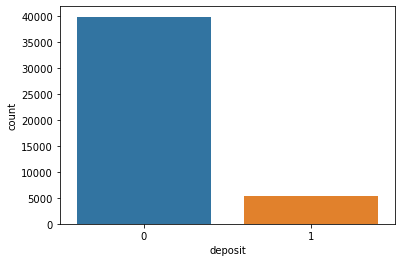

In [ ]:
sns.countplot(x='deposit', data=bank_data);

El dataset está muy desbalanceado ya que tenemos muchas más muestras de un tipo que de otro.

## Análisis exploratorio de las variables predictoras

**Muestra la distribución por edades de los clientes. Usa el tipo de visualización que quieras.**

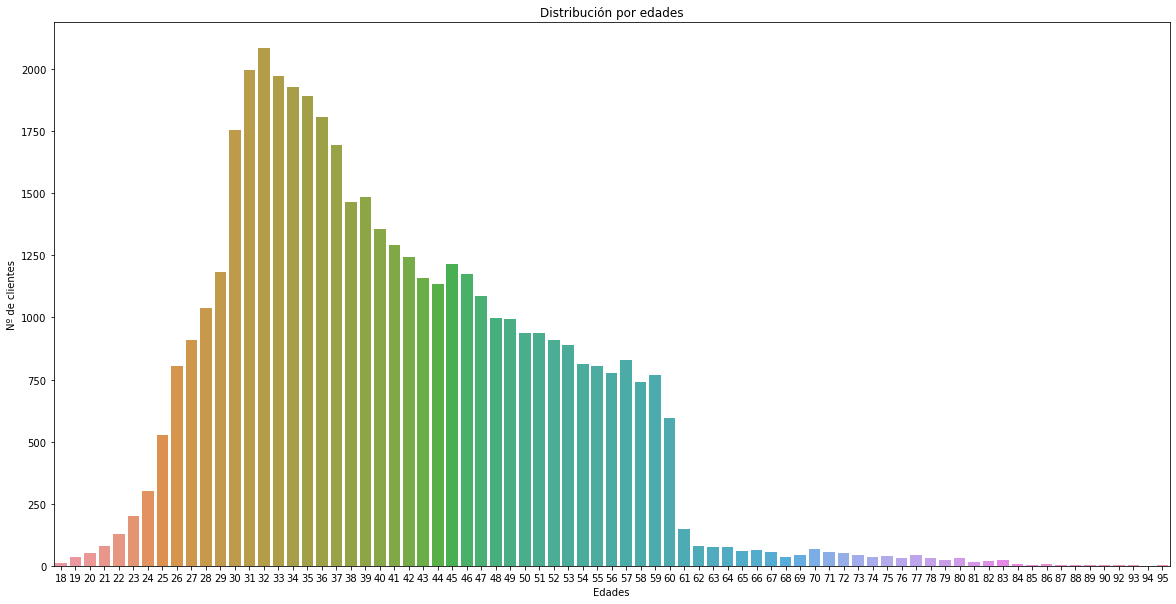

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=bank_data)
plt.xlabel('Edades')
plt.ylabel('Nº de clientes')
plt.title('Distribución por edades');

**Crea un barplot para cada una de las variables predictoras categóricas del dataset en función de la variable de salida.**

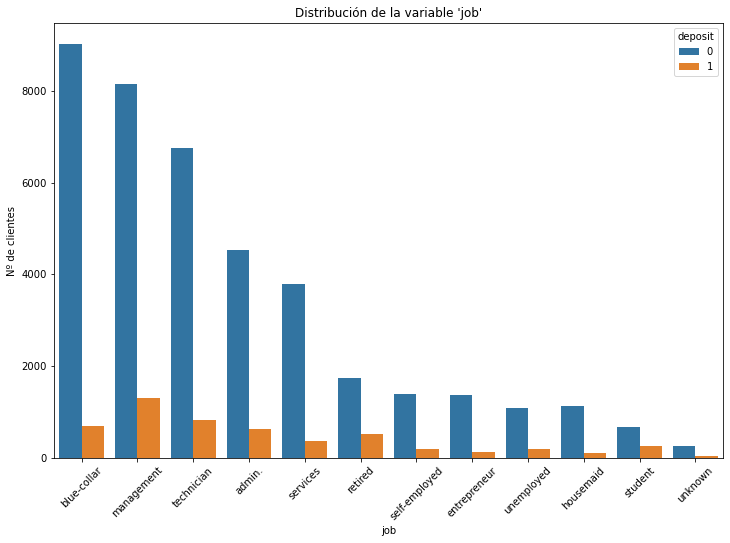

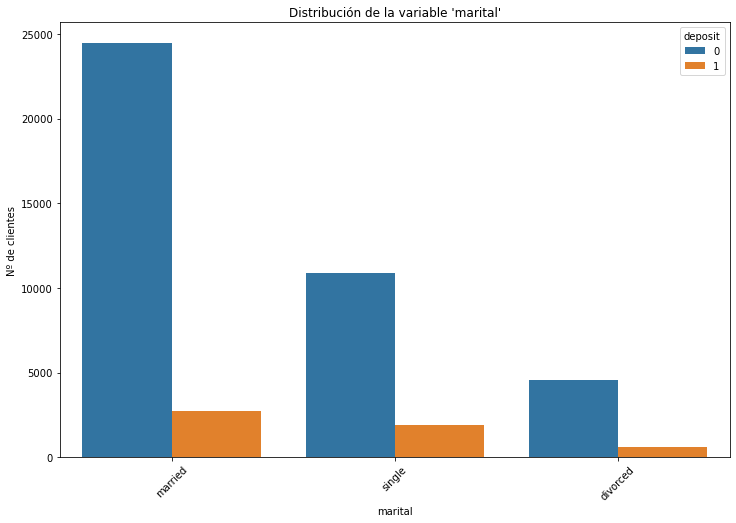

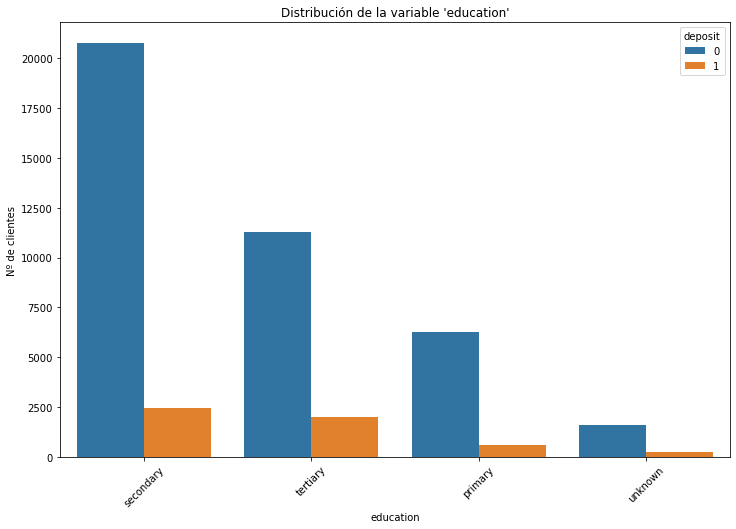

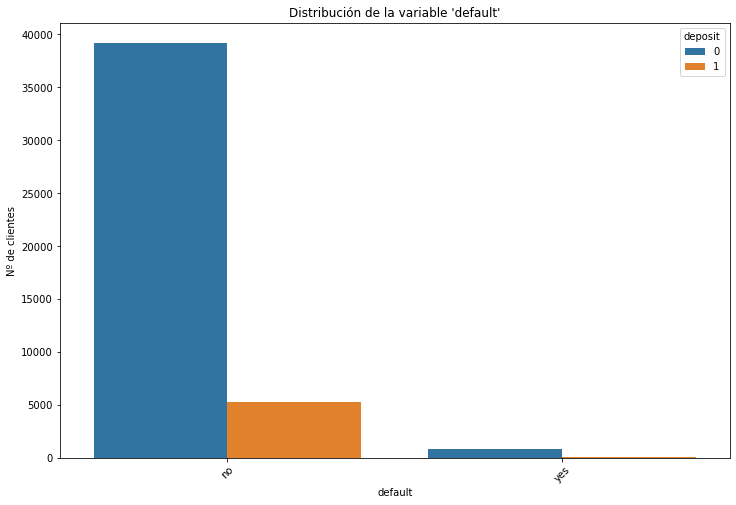

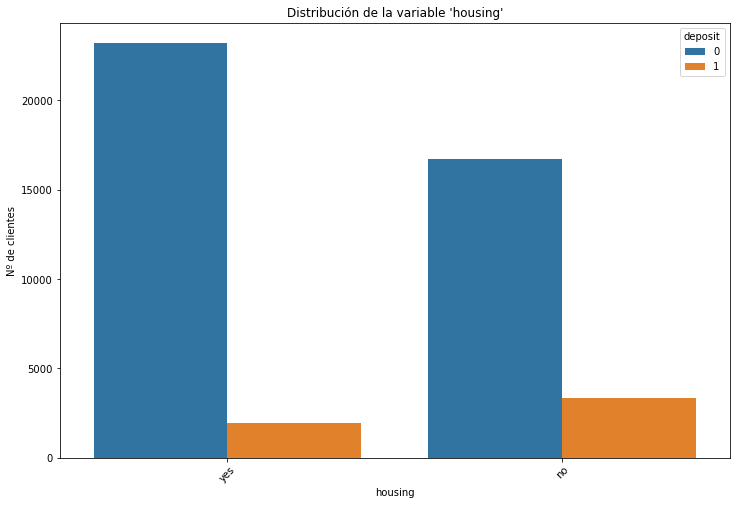

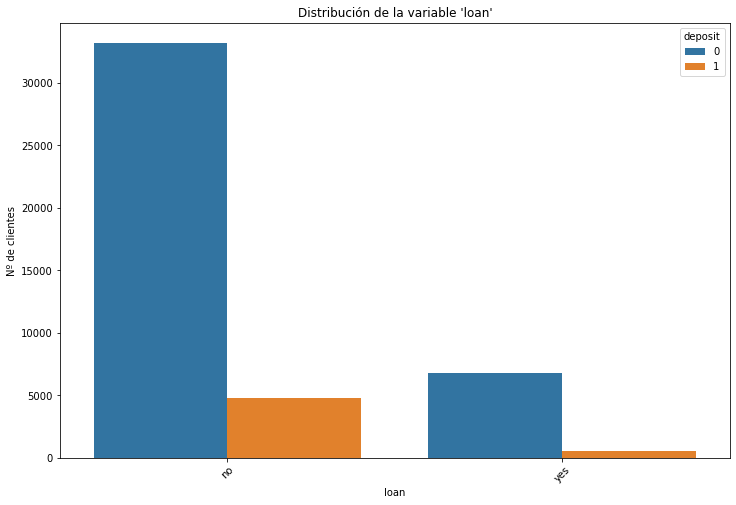

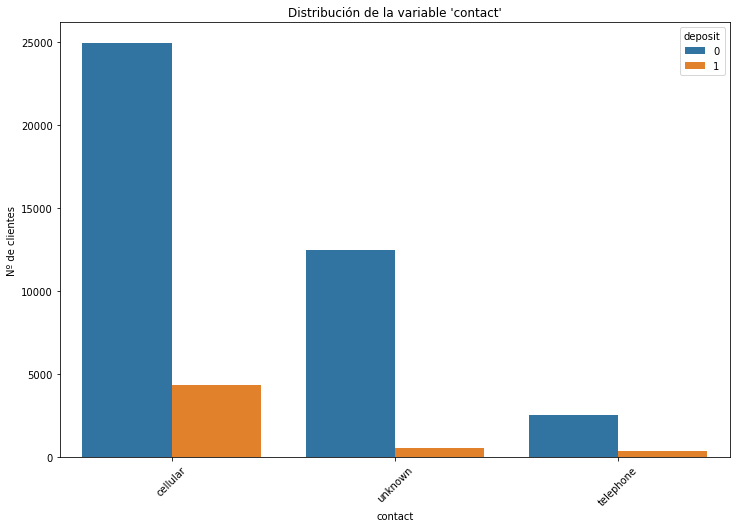

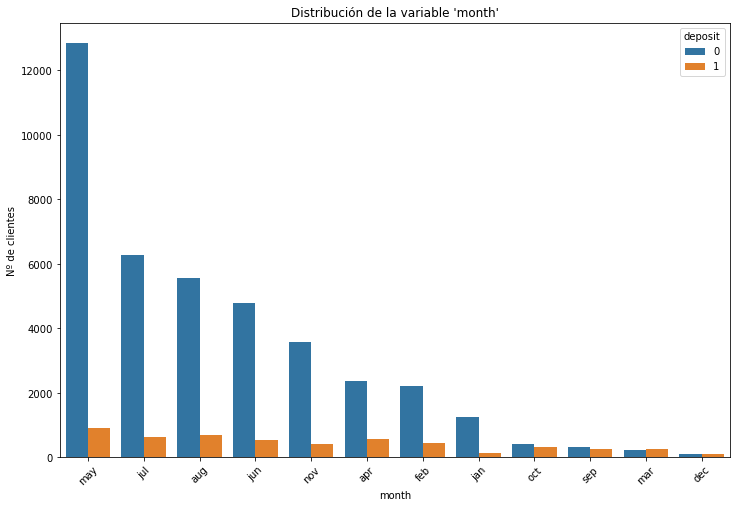

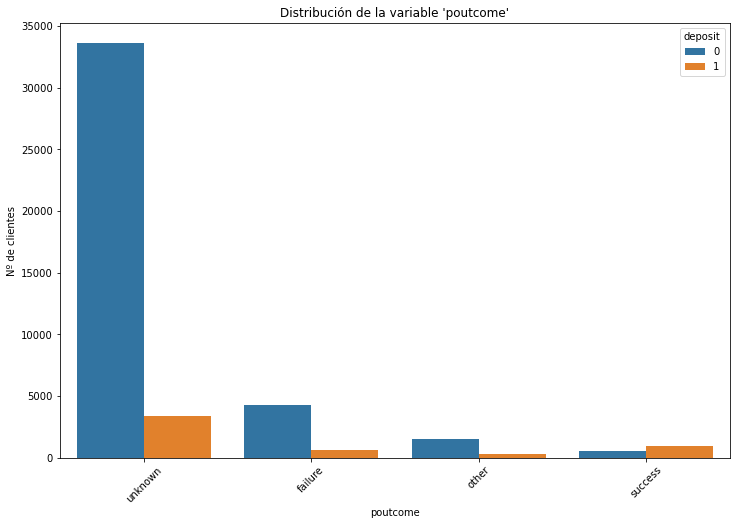

In [ ]:
for column in bank_data.select_dtypes(exclude=[np.number]).columns:
    order = bank_data[column].value_counts().index
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=bank_data, hue='deposit', order=order)
    plt.xticks(rotation=45)
    plt.ylabel('Nº de clientes')
    plt.title(f"Distribución de la variable '{column}'");

**Usa un pairplot para mostrar la distribución y las relaciones de las variables numéricas predictoras en base a la variable de salida.**

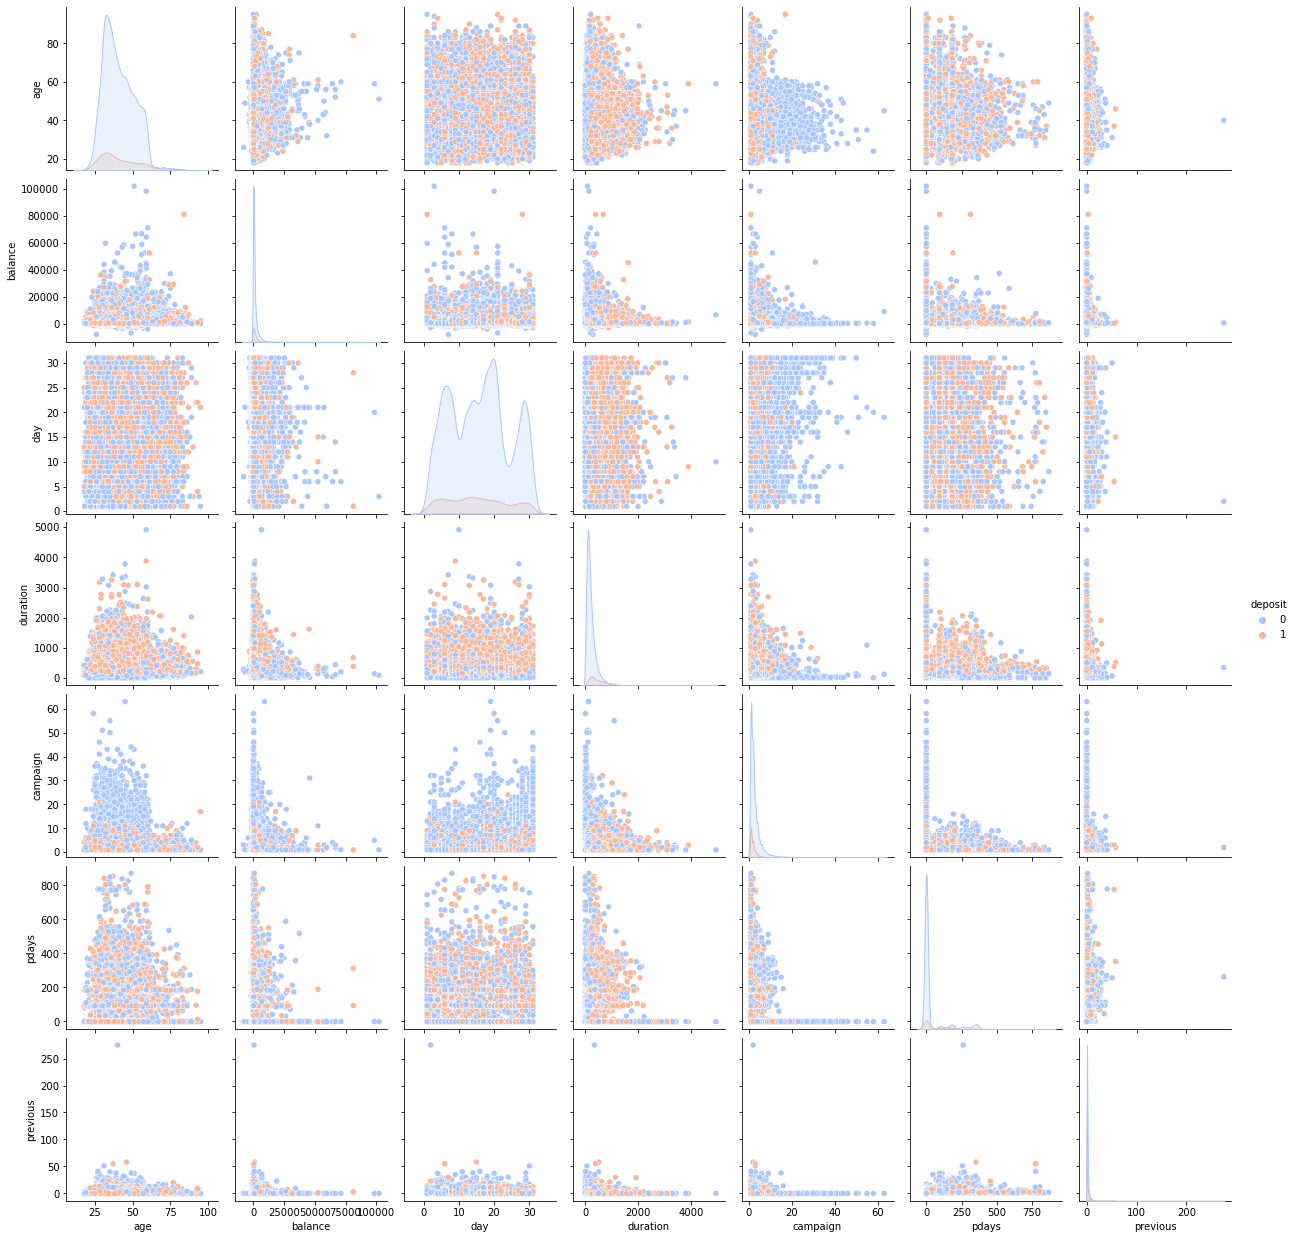

In [ ]:
sns.pairplot(bank_data, hue='deposit', palette='coolwarm');

**Transforma los meses en su correspondiente número, y muestra el conteo antes y después para ver que has realizado la modificación correctamente.**

In [ ]:
bank_data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
bank_data['month'] = pd.to_datetime(bank_data['month'], format='%b').dt.month
bank_data['month'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

**Transforma las variables categóricas binarias `default`, `housing` y `loan` en variables numéricas de tipo `0/1`. A continuación, muéstralas para ver que la transformación ha sido correcta.**

In [ ]:
for c in ['default', 'housing', 'loan']:
    bank_data[c] = bank_data[c].replace({'yes': 1, 'no': 0})

In [ ]:
bank_data.loc[:, ['default', 'housing', 'loan']]

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


**Cuántos clientes NO han sido contactados nunca.**

In [ ]:
print(f"Nº de clientes que no han sido contactados nunca: {len(bank_data[bank_data['pdays'] == -1])}")

Nº de clientes que no han sido contactados nunca: 36954


**De los clientes que fueron contactados previamente, ¿cuántos días han pasado desde que contactaron al primero?**

In [ ]:
print(f"Días transcurridos: {bank_data['pdays'].max()}")

Días transcurridos: 871


**Realiza 3 consultas que te parezcan interesantes al conjunto de datos similares a las dos anteriores usando lo que aprendiste en el notebook de práctica. Otro ejemplo: "¿Qué clientes que trabajan como técnicos han contratado un depósito?".**

In [ ]:
bank_data[(bank_data['job'] == 'technician') & (bank_data['deposit'] == 1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
87,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
446,39,technician,single,unknown,0,45248,1,0,unknown,6,5,1623,1,-1,0,unknown,1
457,37,technician,married,secondary,0,1,1,0,unknown,6,5,608,1,-1,0,unknown,1
624,30,technician,married,secondary,0,484,1,0,unknown,6,5,703,1,-1,0,unknown,1
694,36,technician,married,secondary,0,368,1,1,unknown,6,5,1597,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,35,technician,married,secondary,0,0,1,0,cellular,9,11,524,1,96,5,success,1
45182,34,technician,married,secondary,0,133,0,0,cellular,15,11,401,2,187,5,success,1
45200,38,technician,married,secondary,0,557,1,0,cellular,16,11,1556,4,-1,0,unknown,1
45205,25,technician,single,secondary,0,505,0,1,cellular,17,11,386,2,-1,0,unknown,1


**Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset e indica qué conclusiones sacas de ellas. Por ejemplo: "Crea un scatterplot con la edad del cliente y el dinero que tiene en la cuenta (`balance`)".**

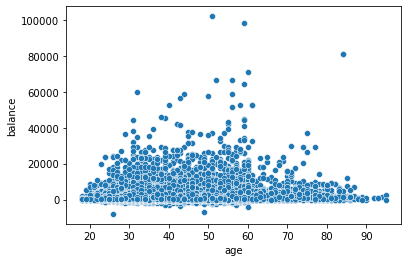

In [ ]:
sns.scatterplot(x='age', y='balance', data=bank_data);

No parece haber una correlación fuerte entre ambas variables.

**Sustituye el valor -1 de `pdays` por un valor grande (por ejemplo 10.000) para que refleje que hace mucho que no se le ha contactado (similar a no haberle contactado nunca).**

In [ ]:
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Comprobamos que se ha cambiado bien
bank_data['pdays'].max()

10000

**Crea una nueva columna llamada `recent_pdays` que refleje aquellos contactos que son más recientes con los valores mas grandes, y los que nunca se les ha contactado con los valores más pequeños (siempre positivos). Para esto, haz el inverso del valor de `pdays`.**

In [ ]:
bank_data['recent_pdays'] = 1 / bank_data['pdays']

**Comprueba los valores mínimo y máximo de la variable `recent_pdays`.**

In [ ]:
bank_data['recent_pdays'].max()

1.0

In [ ]:
bank_data['recent_pdays'].min()

0.0001

**Puesto que ya no la necesitamos, elimina la columna `pdays`.**

In [ ]:
bank_data.drop('pdays', axis=1, inplace=True)

**Dentro de la variable `poutcome` incluye los `other` dentro de los `unknown`, ya que realmente no sabemos qué representan y no parece tener mucho sentido tener ambas separadas. Muestra un conteo de esta variable para ver el resultado.**

In [ ]:
bank_data['poutcome'] = bank_data['poutcome'].replace({'other': 'unknown'})
bank_data['poutcome'].value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

**Eliminamos `contact`, ya que no nos aporta información, y la columna `duration` ya que en el enunciado nos advierten que esta información no está realmente disponible a la hora de hacer la predicción y nos haría incurrir en una fuga de datos.**

In [ ]:
bank_data.drop(['duration', 'contact'], axis=1, inplace=True)

**Para poder pasarle los datos al algoritmo k-NN necesitamos convertir todas las variables categóricas a numéricas. Para ello vamos a usar un método conocido como _one-hot encoding_, que lo que hace es asignar a cada categoría un vector que contiene `1s` y `0s`, lo que denota la presencia o ausencia de esa característica. Usa la función `get_dummies()` de Pandas.**

In [ ]:
bank_data = pd.get_dummies(bank_data)
bank_data.head(5)

,age,default,balance,housing,loan,day,month,campaign,previous,deposit,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,1,0,0,...,0,0,1,0,0,0,1,0,0,1


**Muestra la matriz de correlación de las variables.**

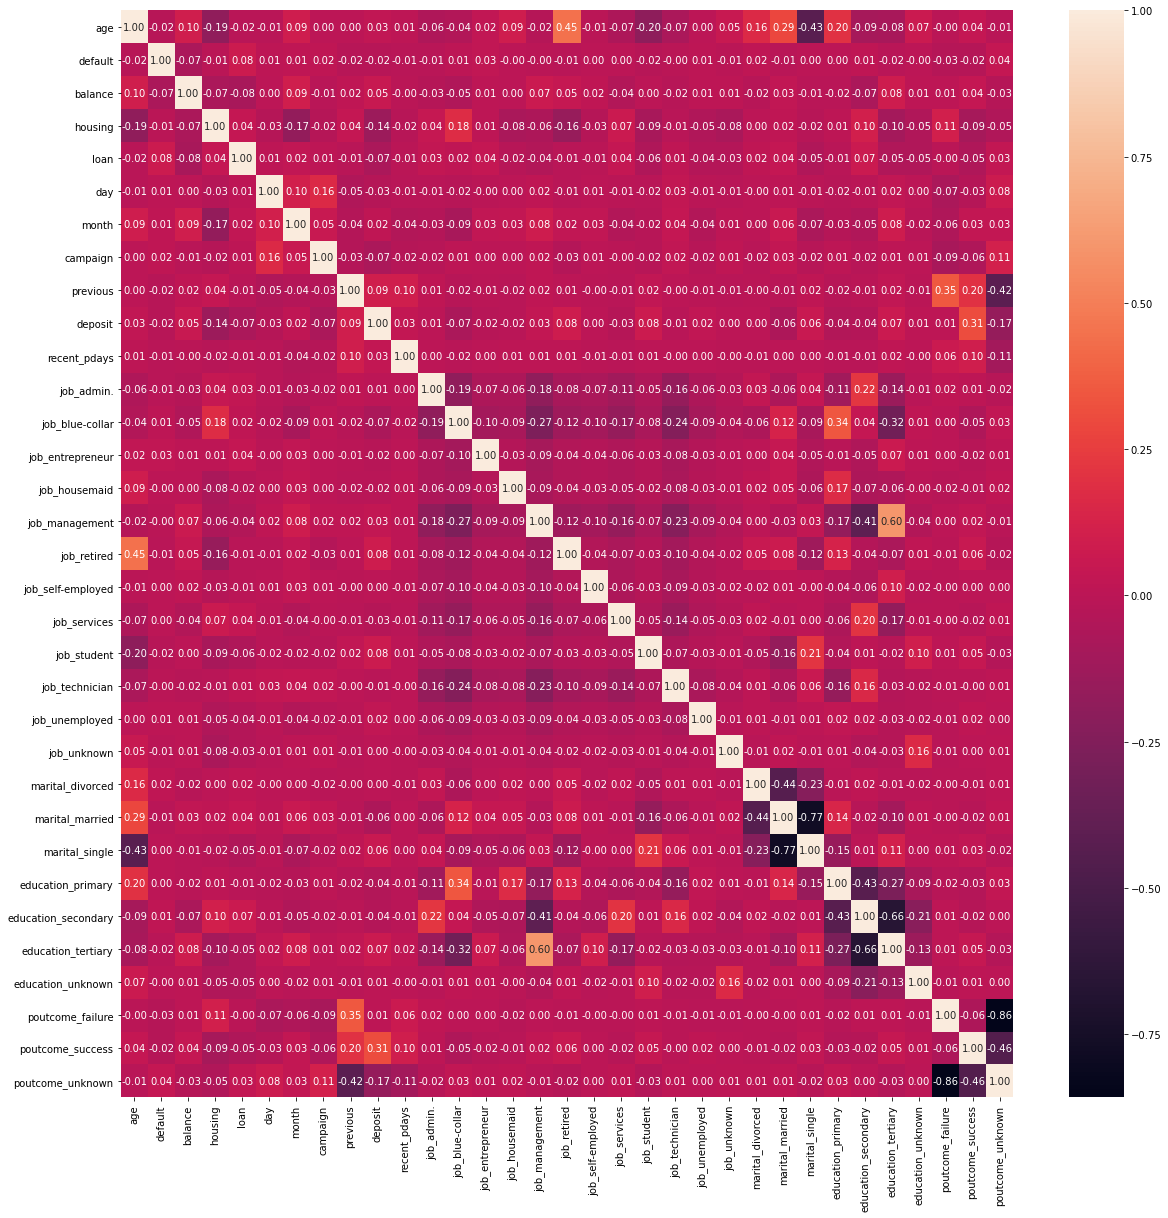

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(bank_data.corr(), annot=True, fmt='.2f');

## División conjuntos de entrenamiento y prueba

Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

In [ ]:
X = bank_data.drop('deposit', axis=1)
y = bank_data['deposit']

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros `random_state` y `stratify`?**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    stratify=y)

El parámetro `random_state` nos permite establecer una semilla de forma que el conjunto de datos se divida aleatoriamente siempre de la misma manera para esa semilla, de modo que nos permita comparar los resultados de una ejecución con otra, es decir, hace que nuestros resultados sean reproducibles.

El parámetro `stratify` hace que al dividir el dataset se conserve la proporción de las clases objetivo en ambos subconjuntos de datos que la que tiene el conjunto de datos de entrada.

## Normalización de los datos

Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

**Normaliza los datos de entrenamiento y prueba usando la función `MinMaxScaler()` de la librería Scikit-Learn.**

In [ ]:
s = MinMaxScaler()
s.fit(X_train)
X_train_s = s.transform(X_train)
X_test_s = s.transform(X_test)

## Entrenamiento modelo

Vamos a usar el modelo _**k-Nearest Neighbors**_ para crear un clasificador que nos permita predecir a partir de los datos que tenemos si un cliente contratará o no el depósito a plazo como resultado de la campaña de marketing.

**Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona. Prueba diferentes valores de `k`, por ejemplo entre 1 y 20.**

In [ ]:
best_n = 0
best_training = 0
best_test = 0
error_rate = []
acc = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, y_train)

    training_score = knn.score(X_train_s, y_train)
    test_score = knn.score(X_test_s, y_test)
    
    y_pred = knn.predict(X_test_s)
    error_rate.append(np.mean(y_pred != y_test))
    acc.append(accuracy_score(y_test, y_pred))
    

    print(f"Con k={i}, training score - {training_score} y test score - {test_score}")

    if test_score > best_test:
        best_n = i
        best_training = training_score
        best_test = test_score

print(f"Mejor nº de vecinos - {best_n}")
print(f"Mejor training score - {best_training:.3f}")
print(f"Mejor test score - {best_test:.3f}")

Con k=1, training score - 0.9999705084345877 y test score - 0.8432274617358223
Con k=2, training score - 0.9159195470095552 y test score - 0.883128372998319
Con k=3, training score - 0.9159490385749676 y test score - 0.8762275502079094
Con k=4, training score - 0.9042998702371122 y test score - 0.8887021144828806
Con k=5, training score - 0.9045358027604106 y test score - 0.8868442006546935
Con k=6, training score - 0.8997581691636192 y test score - 0.8889675307440502
Con k=7, training score - 0.8999056269906807 y test score - 0.8890560028311068
Con k=8, training score - 0.8977822342809957 y test score - 0.8910023887463505
Con k=9, training score - 0.8985490149817152 y test score - 0.8907369724851809
Con k=10, training score - 0.8964551138374425 y test score - 0.8920640537910289
Con k=11, training score - 0.8968679957532146 y test score - 0.891090860833407
Con k=12, training score - 0.8954818921788369 y test score - 0.8910023887463505
Con k=13, training score - 0.8955408753096614 y tes

**(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.**

Mínima tasa de error - 0.10793594620897107 en k=10


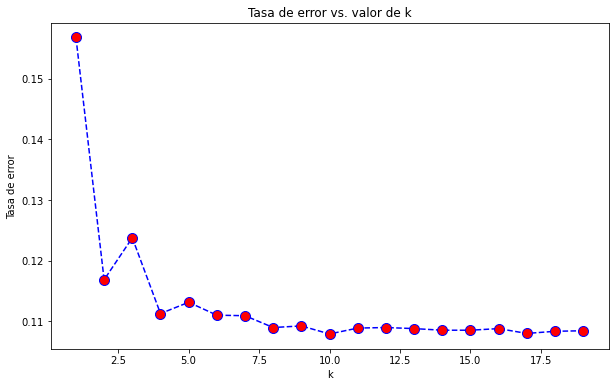

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Tasa de error vs. valor de k')
plt.xlabel('k')
plt.ylabel('Tasa de error')
print(f"Mínima tasa de error - {min(error_rate)} en k={error_rate.index(min(error_rate)) + 1}")

**(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.**

Máximo accuracy - 0.8920640537910289 en k=10


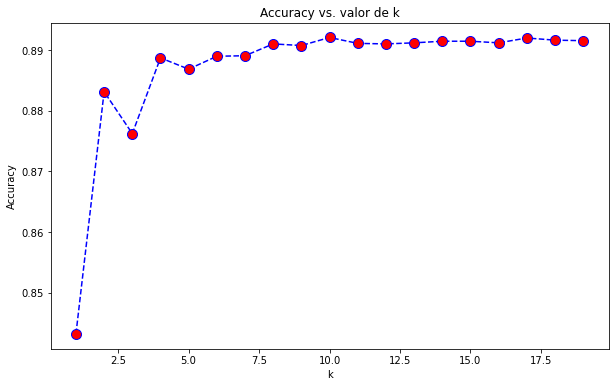

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20),
         acc,
         color='blue',
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Accuracy vs. valor de k')
plt.xlabel('k')
plt.ylabel('Accuracy')
print(f"Máximo accuracy - {max(acc)} en k={acc.index(max(acc)) + 1}")

**Entrena de nuevo el clasificador con el `k` que has seleccionado.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=10)

## Realizar predicciones

**Realiza las predicciones para el conjunto de prueba.**

In [ ]:
y_pred = knn.predict(X_test_s)

## Evaluación del modelo

**Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.**

In [ ]:
print(f"Training score - {knn.score(X_train_s, y_train):.3f}")
print(f"Test score - {knn.score(X_test_s, y_test):.3f}")

Training score - 0.896
Test score - 0.892


**Muestra la matriz de confunsión para el clasificador.**

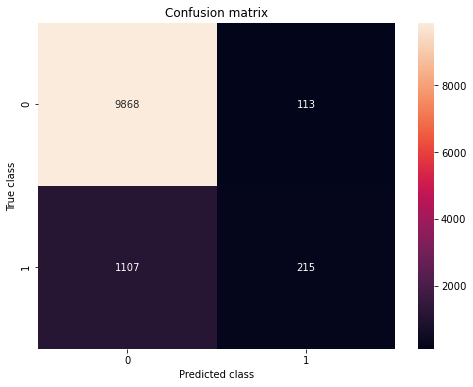

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

**Imprime el informe de clasificación. ¿Qué conclusiones sacas?**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9981
           1       0.66      0.16      0.26      1322

    accuracy                           0.89     11303
   macro avg       0.78      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



A pesar de tener un accuracy muy alto, del 89% en el test de prueba, si nos fijamos en la precisión y el recall de la clase minoritaria, que es en realidad la que más nos interesa clasificar correctamente, las métricas no son especialmente buenas.

Lo que nos interesa sobre todo es ser capaces de detectar aquellos clientes que tienen más probabilidades de acabar contratando un depósito a plazo para centrar nuestros esfuerzos en ellos, y en ese nuestro modelo no es bueno ya que tiene un recall muy bajo para esta clase.

Más adelante en este curso aprenderemos algoritmos mucho más potentes así como una serie de técnicas que nos permitirán obtener mejores resultados cuando trabajamos con conjuntos de datos desbalanceados como este. 

**Por último, crea una visualización con la curva ROC y la métrica del área bajo la curva.**

In [ ]:
y_pred = knn.predict_proba(X_test_s)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

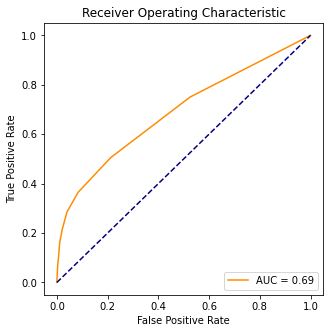

In [ ]:
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
         label='AUC = %0.2f' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right');